## US Personal Credit Loan Data Default Prediction



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Imputer
from sklearn.cross_validation import StratifiedShuffleSplit,StratifiedKFold,train_test_split
from scipy import stats
from sklearn import decomposition,linear_model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier
from sklearn.manifold import Isomap
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import RidgeClassifier,Lasso,SGDClassifier,LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,recall_score,f1_score,hamming_loss
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.model_selection import GridSearchCV
from sklearn.externals import joblib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import roc_auc_score,precision_recall_curve,f1_score
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.externals import joblib
from sklearn.manifold import Isomap
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import mean_squared_error
import lightgbm as lgb
from wordcloud import WordCloud
import re
from nltk.corpus import stopwords,wordnet
from nltk.stem.wordnet import WordNetLemmatizer
import nltk
import os
from collections import Counter
import plotly.plotly as py
import plotly.graph_objs as go
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
%matplotlib inline
#using matplotlib’s ggplot style
plt.style.use('ggplot')
import seaborn as sns
sns.set(color_codes=True)

/Users/gyang/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Download Personal Loan Data
#### [Personal Loan Data](https://www.kaggle.com/wendykan/lending-club-loan-data/data)

#### Code is running under python 3.x version

In [2]:
#load dataset
thepath ='/Users/gyang/Desktop/ProjectDataScience/final/'

loandata =pd.read_csv(thepath +'loan.csv')

/Users/gyang/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning:

Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.



In [3]:
#fully load original dataset
pd.set_option('display.max_columns',None)
loandata.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,NaN,NaN,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-2015,171.62,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,NaN,NaN,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,NaN,Sep-2013,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,NaN,NaN,2.0,0.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-2014,649.91,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-1996,1.0,35.0,NaN,10.0,0.0,5598.0,21.0,37.0,f,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-2015,357.48,NaN,Jan-2015,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-2011,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-1996,0.0,38.0,NaN,15.0,0.0,27783.0,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-2016,67.79,Feb-2016,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
loandata.shape

(887379, 74)

## Data Cleaning

In [5]:
loandata.dtypes

id                               int64
member_id                        int64
loan_amnt                      float64
funded_amnt                    float64
funded_amnt_inv                float64
term                            object
int_rate                       float64
installment                    float64
grade                           object
sub_grade                       object
emp_title                       object
emp_length                      object
home_ownership                  object
annual_inc                     float64
verification_status             object
issue_d                         object
loan_status                     object
pymnt_plan                      object
url                             object
desc                            object
purpose                         object
title                           object
zip_code                        object
addr_state                      object
dti                            float64
delinq_2yrs              

In [6]:
loandata2 =loandata.drop(['id','member_id','emp_title','url','zip_code','desc','issue_d',
                         'earliest_cr_line','last_pymnt_d','next_pymnt_d','last_credit_pull_d'], axis=1, inplace=False)

In [7]:
loandata2.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,purpose,title,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,Fully Paid,n,credit_card,Computer,AZ,27.65,0.0,1.0,NaN,NaN,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,171.62,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Charged Off,n,car,bike,GA,1.00,0.0,5.0,NaN,NaN,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,119.66,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Fully Paid,n,small_business,real estate business,IL,8.72,0.0,2.0,NaN,NaN,2.0,0.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,649.91,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Fully Paid,n,other,personel,CA,20.00,0.0,1.0,35.0,NaN,10.0,0.0,5598.0,21.0,37.0,f,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,357.48,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,1 year,RENT,80000.0,Source Verified,Current,n,other,Personal,OR,17.94,0.0,0.0,38.0,NaN,15.0,0.0,27783.0,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,67.79,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
#reorder grade variable
loandata2['grade'] = loandata2['grade'].astype('category')
loandata2['grade'].cat.reorder_categories(['A','B','C','D','E','F','G'], inplace=True)

#reorder emp_length
loandata2['emp_length'] = loandata2['emp_length'].astype('category')
loandata2['emp_length'].cat.reorder_categories(["< 1 year", "1 year","2 years","3 years","4 years",
                                                "5 years","6 years","7 years","8 years","9 years",
                                                "10+ years","n/a"], inplace=True)

In [9]:
#target label
loandata2['loan_status'].value_counts()

Current                                                601779
Fully Paid                                             207723
Charged Off                                             45248
Late (31-120 days)                                      11591
Issued                                                   8460
In Grace Period                                          6253
Late (16-30 days)                                        2357
Does not meet the credit policy. Status:Fully Paid       1988
Default                                                  1219
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

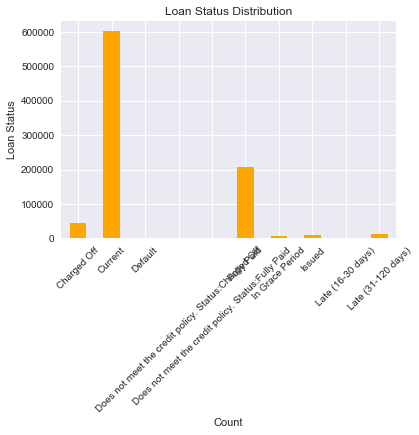

In [10]:
ax1 =loandata2.groupby('loan_status').size().plot(kind='bar',color ='orange',rot=45,title="Loan Status Distribution")
ax1.set_xlabel("Count")
ax1.set_ylabel("Loan Status")
ax1.grid(True)

In [11]:
def loanStat(x):
    if x in ['Current','Fully Paid','In Grace Period']:
        return 0
    else:
        return 1    

In [12]:
loandata2['default'] =loandata2['loan_status'].apply(lambda x :loanStat(x))
loandata2['default'] = loandata2['default'].astype('category')

In [13]:
loandata2['default'].value_counts()

0    815755
1     71624
Name: default, dtype: int64

In [14]:
#check missing value
#categorical features
miss_category = loandata2.select_dtypes(include=['object','category'])
miss_cate_rate = miss_category.isnull().sum(axis =0)/float(len(miss_category))
miss_cate_rate.sort_values(ascending=False)

verification_status_joint    0.999424
title                        0.000170
default                      0.000000
application_type             0.000000
initial_list_status          0.000000
addr_state                   0.000000
purpose                      0.000000
pymnt_plan                   0.000000
loan_status                  0.000000
verification_status          0.000000
home_ownership               0.000000
emp_length                   0.000000
sub_grade                    0.000000
grade                        0.000000
term                         0.000000
dtype: float64

In [15]:
loandata3 =loandata2.drop(miss_cate_rate[miss_cate_rate >0.5].index, axis=1, inplace=False) 

In [16]:
# check numerical features
miss_numerical = loandata3.select_dtypes(exclude=['object','category'])
miss_num_rate = miss_numerical.isnull().sum(axis =0)/float(len(miss_numerical))
miss_num_rate.sort_values(ascending=False)

dti_joint                      0.999426
annual_inc_joint               0.999424
il_util                        0.979020
mths_since_rcnt_il             0.976549
total_cu_tl                    0.975916
open_acc_6m                    0.975916
open_il_6m                     0.975916
open_il_12m                    0.975916
open_il_24m                    0.975916
inq_last_12m                   0.975916
total_bal_il                   0.975916
inq_fi                         0.975916
open_rv_24m                    0.975916
max_bal_bc                     0.975916
all_util                       0.975916
open_rv_12m                    0.975916
mths_since_last_record         0.845553
mths_since_last_major_derog    0.750160
mths_since_last_delinq         0.511971
tot_cur_bal                    0.079195
tot_coll_amt                   0.079195
total_rev_hi_lim               0.079195
revol_util                     0.000566
collections_12_mths_ex_med     0.000163
total_acc                      0.000033


In [17]:
loandata4 =loandata3.drop(miss_num_rate[miss_num_rate >0.5].index, axis=1, inplace=False) 

In [18]:
#lower case
loandata4['title'] =loandata4['title'].str.lower()

In [19]:
def loantitle(x):
    if x in ['business']: #business
        return 1
    elif x in ['other']: #other
        return 3
    else:
        return 2 #personal

In [20]:
loandata4['loan_title'] =loandata4['title'].apply(lambda x :loantitle(x))
loandata4['loan_title'] = loandata4['loan_title'].astype('category')

In [21]:
#drop title feature
loandata5 =loandata4.drop(['title','loan_status'],1)

In [22]:
loandata5.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default,loan_title
0,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,n,credit_card,AZ,27.65,0.0,1.0,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,171.62,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,0,2
1,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,n,car,GA,1.00,0.0,5.0,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,119.66,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,1,2
2,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,n,small_business,IL,8.72,0.0,2.0,2.0,0.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,649.91,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,0,2
3,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,n,other,CA,20.00,0.0,1.0,10.0,0.0,5598.0,21.0,37.0,f,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,357.48,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,0,2
4,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,1 year,RENT,80000.0,Source Verified,n,other,OR,17.94,0.0,0.0,15.0,0.0,27783.0,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,67.79,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,0,2


In [25]:
#export to csv
loandata5.to_csv(thepath +'loandata5.csv',index=False)

## Data Visualization

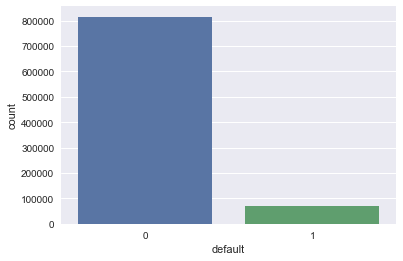

In [106]:
sns.countplot(x="default", data=loandata5)

In [24]:
loandata2['emp_length'].value_counts()

10+ years    291569
2 years       78870
< 1 year      70605
3 years       70026
1 year        57095
5 years       55704
4 years       52529
n/a           44825
7 years       44594
8 years       43955
6 years       42950
9 years       34657
Name: emp_length, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

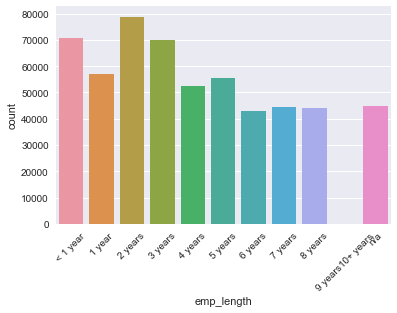

In [25]:
sns.countplot(x="emp_length", data=loandata5,order=["< 1 year", "1 year","2 years","3 years","4 years",
                                                   "5 years","6 years","7 years","8 years","9 years"
                                                   "10+ years","n/a"])
plt.xticks(rotation=45)

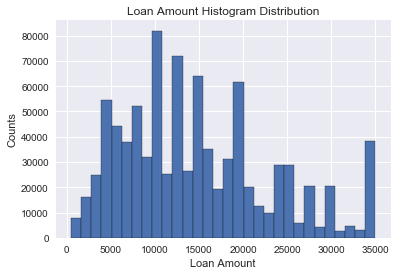

In [26]:
sns.set()
_ =plt.hist(loandata5['loan_amnt'],edgecolor='black',bins =30)
_ =plt.xlabel('Loan Amount')
_ =plt.ylabel('Counts')
_ =plt.title('Loan Amount Histogram Distribution')
plt.show()

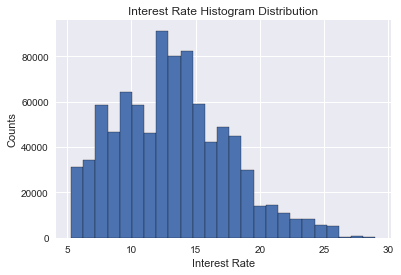

In [27]:
sns.set()
_ =plt.hist(loandata5['int_rate'],edgecolor='black',bins =25)
_ =plt.xlabel('Interest Rate')
_ =plt.ylabel('Counts')
_ =plt.title('Interest Rate Histogram Distribution')
plt.show()

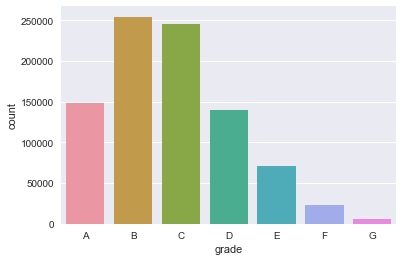

In [28]:
sns.countplot(x="grade", data=loandata5)

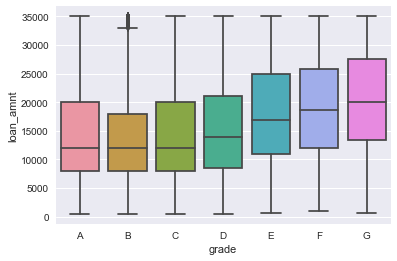

In [29]:
sns.boxplot(x="grade", y="loan_amnt", data=loandata5)

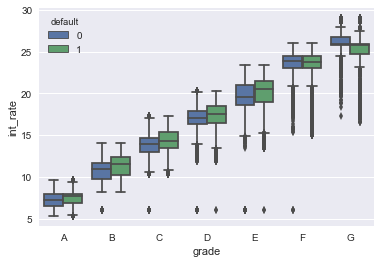

In [30]:
#grade vs interest rate
sns.boxplot(x="grade", y="int_rate",hue="default", data=loandata5)

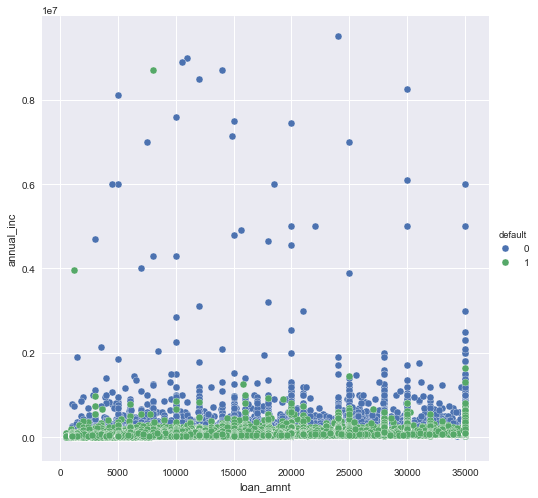

In [31]:
#scatterplot loan amount VS annual income
sns.pairplot(x_vars=["loan_amnt"], y_vars=["annual_inc"], data=loandata5, hue="default", size=7)

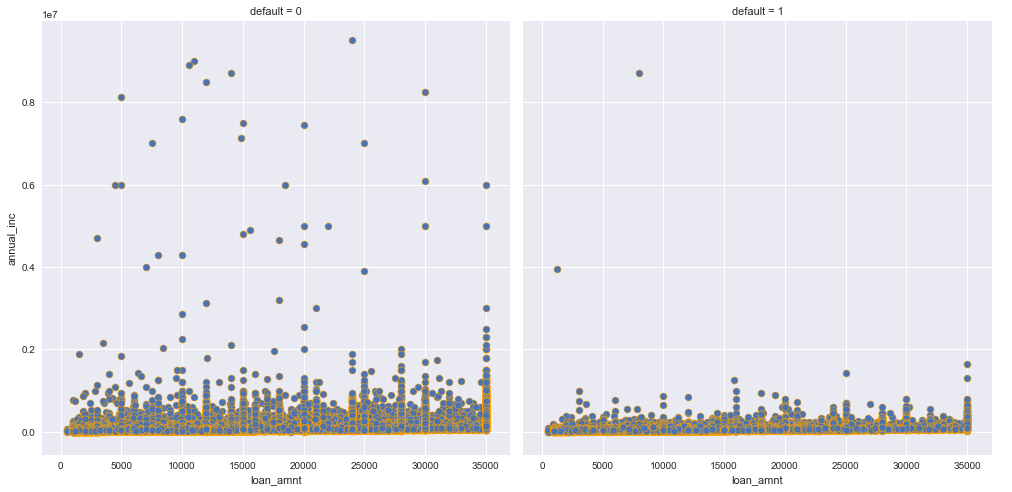

In [32]:
#scatterplot loan amount VS annual income
#grid labels
kws = dict(s=50, linewidth=0.5,edgecolor="orange")
g = sns.FacetGrid(loandata5, col="default", palette="Set1",size =7)
g = (g.map(plt.scatter, "loan_amnt", "annual_inc", **kws).add_legend())

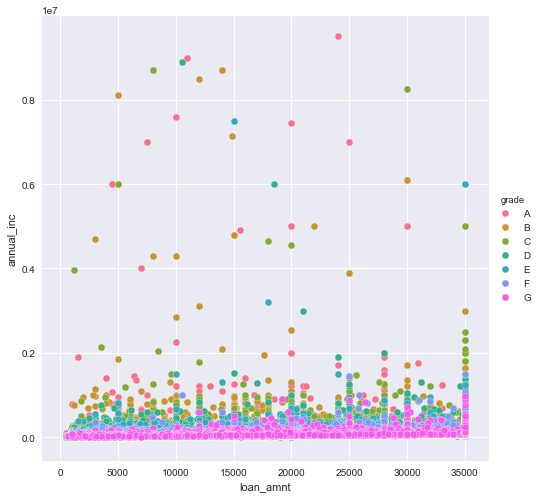

In [33]:
sns.pairplot(x_vars=["loan_amnt"], y_vars=["annual_inc"], data=loandata5, hue="grade", size=7)

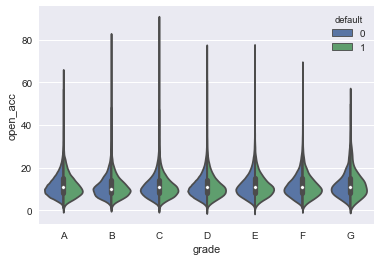

In [34]:
#grade VS Numbers of Open accounts
sns.violinplot(x="grade", y="open_acc", hue="default", data=loandata5, split=True,size =10)

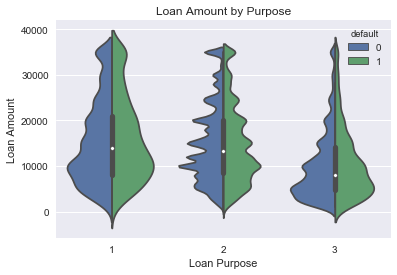

In [35]:
#Loan Purpose VS Loan Amount
sns.violinplot(x="loan_title", y="loan_amnt", hue="default", data=loandata5, split=True,size =15)
plt.title("Loan Amount by Purpose")
plt.xlabel("Loan Purpose")
plt.ylabel("Loan Amount")

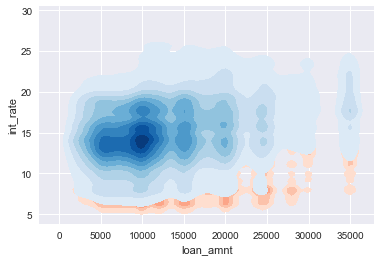

In [36]:
#density plot
#heatmap
#loan amount vs interest rate
#blue color - default =1
#red color - default =0

d0 = loandata5.loc[loandata5.default == 0]
d1 = loandata5.loc[loandata5.default == 1]
ax = sns.kdeplot(d0.loan_amnt, d0.int_rate,
                 cmap="Reds", shade=True, shade_lowest=False)
ax = sns.kdeplot(d1.loan_amnt, d1.int_rate,
                 cmap="Blues", shade=True, shade_lowest=False)

In [37]:
#wordcloud Description Variable
text = loandata['desc'].dropna().str.lower()
token = [re.sub(r'[^a-zA-Z]+', ' ',token) for token in text]

In [38]:
def filter_list(list_name):
    #remove stopwords
    stops = set(stopwords.words("english"))
    
    #convert to single word within list
    word_list= []
    for words in list_name:
        for word in words[:-4].split():
            word_list.append(word)
            
    filtered_words = [word for word in word_list if word not in stops]
    
    wnl = WordNetLemmatizer()
    
    filtered_words_1 =[]
    for r in filtered_words:
        filtered_words_1.append(wnl.lemmatize(r)) #change plurals nouns.
        
    filtered_words_2 =[]
    for r in filtered_words_1:
        filtered_words_2.append(wnl.lemmatize(r,'v')) #change to original tense(verb.)
    
    return filtered_words_2   

In [39]:
new_token =filter_list(token)
new_str =','.join(new_token) #convert into string

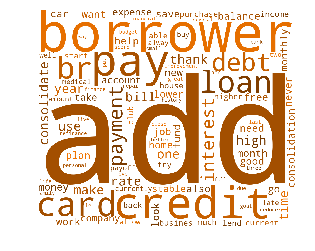

In [40]:
def random_color_func(word=None, font_size=None, position=None,  orientation=None, font_path=None, random_state=None):
    h = int(360.0 * 21.0 / 255.0)
    s = int(100.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(60, 120)) / 255.0)

    return "hsl({}, {}%, {}%)".format(h, s, l)

wordcloud = WordCloud(background_color='white',width=1200,
                      height=1000,max_words=100,color_func=random_color_func).generate(new_str)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [41]:
df = pd.DataFrame({'Total_LoanAmount' : loandata.groupby(['addr_state'])['loan_amnt'].sum(),
                  'Avg_Income':loandata.groupby(['addr_state'])['annual_inc'].mean(),
                  'Avg_InterestRate':loandata.groupby(['addr_state'])['int_rate'].mean(),
                  'Total_Payment':loandata.groupby(['addr_state'])['total_pymnt'].sum(),
                  'Avg_OpenAcc':loandata.groupby(['addr_state'])['total_acc'].mean()}).reset_index()

In [42]:
df.head()

,addr_state,Avg_Income,Avg_InterestRate,Avg_OpenAcc,Total_LoanAmount,Total_Payment
0,AK,77009.756503,13.639791,23.809524,3.697805e+07,2.115020e+07
1,AL,68532.348454,13.757150,26.688571,1.646276e+08,8.223780e+07
2,AR,65818.677627,13.458215,25.967771,9.341608e+07,4.618769e+07
3,AZ,71642.650718,13.131357,25.042769,2.901101e+08,1.489150e+08
4,CA,79294.338641,13.161718,23.409081,1.898145e+09,1.044048e+09


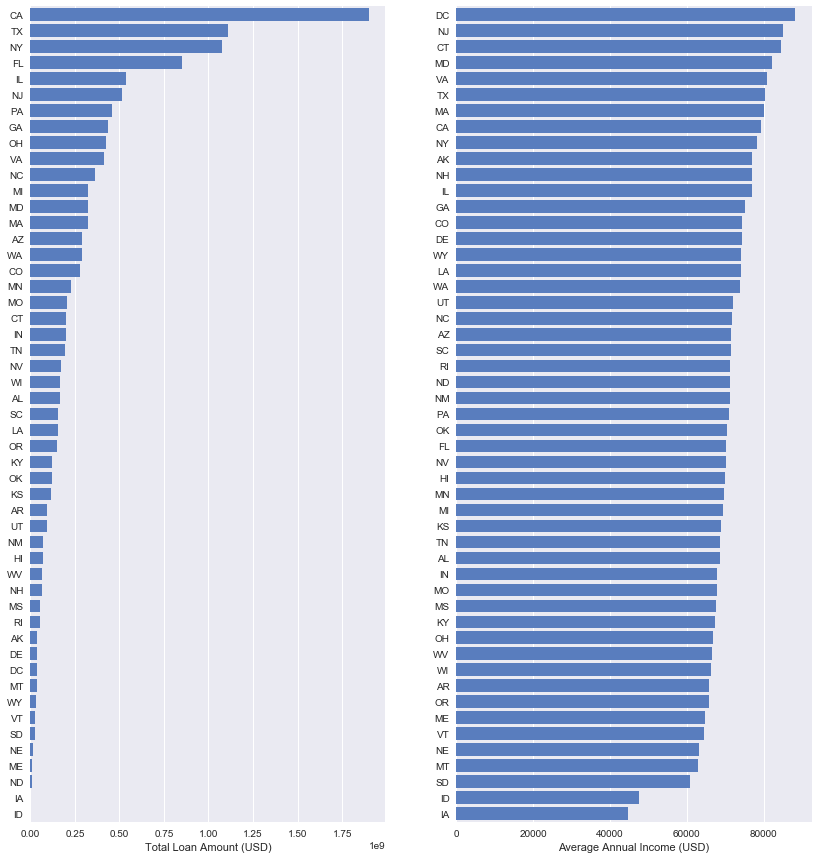

In [43]:
sns.set()
# Top States on Total Loan Amount VS Average Income
df.sort_values(['Total_LoanAmount'], ascending=False, inplace=True)

f, ax = plt.subplots(nrows=1, ncols=2,figsize=(14, 15))

#add col 1 -- total loan
sns.set_color_codes("muted")
sns.barplot(x='Total_LoanAmount', y='addr_state', data=df,color="b",ax=ax[0])
#ax.set_xlabel('Total Loan Amount')
#ax.set_ylabel('States (Abv.)')
#ax.legend(ncol=2, loc="lower right", frameon=True)
ax[0].set(ylabel="",xlabel="Total Loan Amount (USD)")
sns.despine(left=True, bottom=True)

#add col 2 -- average income 
df.sort_values(['Avg_Income'], ascending=False, inplace=True)
sns.set_color_codes("muted")
sns.barplot(x='Avg_Income', y='addr_state', data=df,color="b",ax=ax[1])
ax[1].set(ylabel="",xlabel="Average Annual Income (USD)")
sns.despine(left=True, bottom=True)

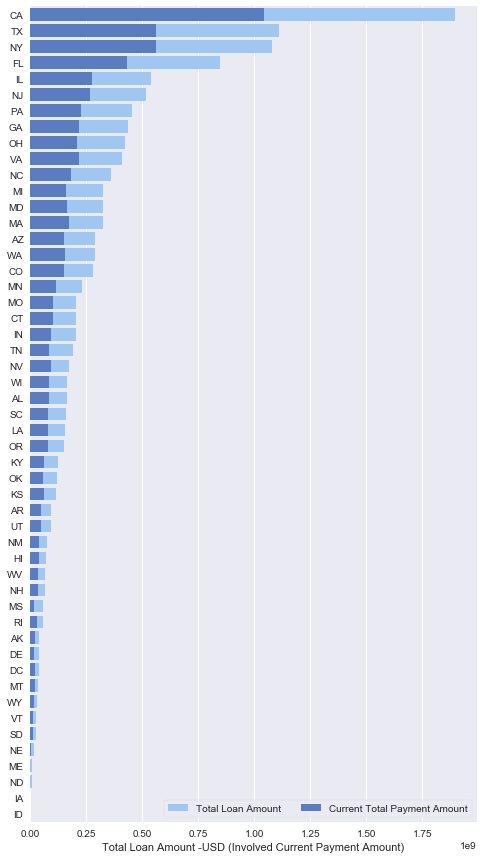

In [44]:
# Total Loan Amount -USD (Involved Current Payment Amount)

sns.set()
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(8, 15))

df.sort_values(['Total_LoanAmount'], ascending=False, inplace=True)

# Plot the total loan amount
sns.set_color_codes("pastel")
sns.barplot(x="Total_LoanAmount", y="addr_state", data=df,
            label="Total Loan Amount", color="b")

# Plot current total payment amount involved
sns.set_color_codes("muted")
sns.barplot(x="Total_Payment", y="addr_state", data=df,
            label="Current Total Payment Amount", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(ylabel="",
       xlabel="Total Loan Amount -USD (Involved Current Payment Amount)")
sns.despine(left=True, bottom=True)

In [45]:
import plotly
# register Poltly free account first,then check out your API keys
plotly.tools.set_credentials_file(username='yg2499', api_key='el7rt983crGV1cp4vHvr')

In [46]:
for col in df.columns:
    df[col] = df[col].astype(str)

scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
        [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

df['text'] = df['addr_state'] + '<br>'+\
            'Average Annual Income (USD): '+df['Avg_Income'] +'<br>'+\
            'Average Interest Rate (Percentage): '+df['Avg_InterestRate']+'<br>'+\
            'Total Payment Amount (USD): '+df['Total_Payment'] +'<br>'+\
            'Average Number of Open Account: '+df['Avg_OpenAcc']

data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = df['addr_state'],
        z = df['Total_LoanAmount'].astype(float),
        locationmode = 'USA-states',
        text = df['text'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Billions USD")
        ) ]

layout = dict(
        title = '2007 -2015 United States Personal Credit Overview by State',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
    
fig = dict( data=data, layout=layout )
py.iplot( fig, filename='d3-cloropleth-map' )

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~yg2499/0 or inside your plot.ly account where it is named 'd3-cloropleth-map'


## Split Dataset

### Part 1: Label -- Default Variable (Loan Status -0/1 Binary Type)

In [182]:
# training data - 70% ,testing data -30%
sess = StratifiedShuffleSplit(loandata5['default'].values,test_size = 0.3)
for train_index,test_index in sess:
    trainData = loandata5.iloc[train_index]
    testData = loandata5.iloc[test_index]
    
X_train_1,y_train = trainData.drop(['default'],1) ,trainData['default']
X_test_1,y_test = testData.drop(['default'],1) ,testData['default']

In [108]:
def cleandata(dt):
    #categorical features
    #one-hot-encode
    CONVERT_COLUMNS =list(dt.select_dtypes(include=['object','category']).columns)
    data_2 = pd.get_dummies(dt, columns =CONVERT_COLUMNS)
    
    #convert all NaN to Zero
    data_3 = data_2.replace(np.nan, 0)
    
    #numerical feature scaling
    scaler = MinMaxScaler()
    header_list = list(data_3.iloc[:,:30].columns)
    data_3[header_list] = scaler.fit_transform(data_3[header_list])
    
    return data_3

In [139]:
X_train =cleandata(X_train_1)
X_test =cleandata(X_test_1)

In [110]:
X_train.rename(columns={'emp_length_< 1 year': 'emp_length_less_1year', 
                        'emp_length_10+ years': 'emp_length_more_10years',
                       'emp_length_n/a': 'emp_length_na'}, inplace=True)
X_test.rename(columns={'emp_length_< 1 year': 'emp_length_less_1year', 
                        'emp_length_10+ years': 'emp_length_more_10years',
                       'emp_length_n/a': 'emp_length_na'}, inplace=True)

In [111]:
X_train.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,term_ 36 months,term_ 60 months,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,sub_grade_A1,sub_grade_A2,sub_grade_A3,sub_grade_A4,sub_grade_A5,sub_grade_B1,sub_grade_B2,sub_grade_B3,sub_grade_B4,sub_grade_B5,sub_grade_C1,sub_grade_C2,sub_grade_C3,sub_grade_C4,sub_grade_C5,sub_grade_D1,sub_grade_D2,sub_grade_D3,sub_grade_D4,sub_grade_D5,sub_grade_E1,sub_grade_E2,sub_grade_E3,sub_grade_E4,sub_grade_E5,sub_grade_F1,sub_grade_F2,sub_grade_F3,sub_grade_F4,sub_grade_F5,sub_grade_G1,sub_grade_G2,sub_grade_G3,sub_grade_G4,sub_grade_G5,emp_length_less_1year,emp_length_1 year,emp_length_2 years,emp_length_3 years,emp_length_4 years,emp_length_5 years,emp_length_6 years,emp_length_7 years,emp_length_8 years,emp_length_9 years,emp_length_more_10years,emp_length_na,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,pymnt_plan_n,pymnt_plan_y,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,addr_state_AK,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_IA,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_ND,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,initial_list_status_f,initial_list_status_w,application_type_INDIVIDUAL,application_type_JOINT,loan_title_1,loan_title_2,loan_title_3
262965,0.855072,0.855072,0.857143,0.365864,0.705957,0.021579,0.001037,0.000000,0.030303,0.200000,0.0,0.011460,0.088199,0.248521,0.000000,0.000000,0.587574,0.587574,0.857142,0.172195,0.0,0.000000,0.000000,0.598508,0.0,0.0,0.0,0.0,0.091039,0.00423,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0
145599,0.217391,0.217391,0.228571,0.245881,0.172599,0.006316,0.002747,0.000000,0.000000,0.255556,0.0,0.010609,0.075087,0.242604,0.021632,0.021632,0.145357,0.145357,0.199272,0.062095,0.0,0.000000,0.000000,0.007221,0.0,0.0,0.0,0.0,0.004666,0.00460,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0
174733,0.159420,0.159420,0.170714,0.287283,0.128662,0.004632,0.003267,0.033333,0.000000,0.055556,0.0,0.003560,0.072397,0.183432,0.000000,0.000000,0.124002,0.123486,0.171428,0.050785,0.0,0.000000,0.000000,0.032424,0.0,0.0,0.0,0.0,0.004424,0.00160,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [112]:
X_train.shape

(621165, 169)

In [113]:
X_test.shape

(266214, 168)

In [114]:
loandata5['pymnt_plan'].value_counts()

n    887369
y        10
Name: pymnt_plan, dtype: int64

In [115]:
X_test['pymnt_plan_n'].value_counts()

1    266211
0         3
Name: pymnt_plan_n, dtype: int64

In [116]:
X_train['pymnt_plan_y'].value_counts()

0    621158
1         7
Name: pymnt_plan_y, dtype: int64

In [117]:
# Get missing columns in the training test
missing_cols = set(X_train.columns) - set(X_test.columns)
# Add a missing column in test set with default value equal to 0
for c in missing_cols:
    X_test[c] = 0
# Ensure the order of column in the test set is in the same order than in train set
X_test = X_test[X_train.columns]

In [118]:
X_test.shape

(266214, 169)

## Dataset is ready to train ...

In [119]:
# build models

lr = LogisticRegression() #logistic regression
rfc = RandomForestClassifier() #random forest
dtc = DecisionTreeClassifier(max_depth=30) #decision tree
abdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),learning_rate=1,algorithm="SAMME",n_estimators=300) #ABDT
xg =XGBClassifier() #XGBoost
nb =GaussianNB() #naive bayes

In [120]:
nb.fit(X_train,y_train)

GaussianNB(priors=None)

In [121]:
xg.fit(X_train,y_train)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [122]:
lr.fit(X_train,y_train)
rfc.fit(X_train,y_train)
dtc.fit(X_train,y_train)
abdt.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1, n_estimators=300, random_state=None)

In [123]:
# create dataset for lightgbm
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

In [124]:
# specify your configurations as a dict
params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': {'l2', 'auc'},
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}
params['metric'] = 'auc'

In [125]:
gbm = lgb.train(params,
                lgb_train,
                valid_sets=lgb_eval,
                num_boost_round=40,)

[1]	valid_0's auc: 0.929126
[2]	valid_0's auc: 0.933991
[3]	valid_0's auc: 0.936471
[4]	valid_0's auc: 0.936564
[5]	valid_0's auc: 0.938112
[6]	valid_0's auc: 0.93846
[7]	valid_0's auc: 0.938168
[8]	valid_0's auc: 0.938411
[9]	valid_0's auc: 0.938892
[10]	valid_0's auc: 0.939114
[11]	valid_0's auc: 0.939955
[12]	valid_0's auc: 0.940595
[13]	valid_0's auc: 0.940419
[14]	valid_0's auc: 0.940699
[15]	valid_0's auc: 0.941078
[16]	valid_0's auc: 0.941443
[17]	valid_0's auc: 0.942436
[18]	valid_0's auc: 0.942567
[19]	valid_0's auc: 0.942642
[20]	valid_0's auc: 0.942691
[21]	valid_0's auc: 0.942771
[22]	valid_0's auc: 0.943001
[23]	valid_0's auc: 0.943073
[24]	valid_0's auc: 0.943062
[25]	valid_0's auc: 0.94352
[26]	valid_0's auc: 0.943616
[27]	valid_0's auc: 0.9437
[28]	valid_0's auc: 0.9439
[29]	valid_0's auc: 0.943827
[30]	valid_0's auc: 0.943982
[31]	valid_0's auc: 0.944083
[32]	valid_0's auc: 0.944147
[33]	valid_0's auc: 0.944157
[34]	valid_0's auc: 0.944504
[35]	valid_0's auc: 0.944712


In [126]:
pred_gbm = gbm.predict(X_test,num_iteration=gbm.best_iteration)

In [127]:
pred_lr = lr.predict_proba(X_test)
pred_rfc = rfc.predict_proba(X_test)
pred_dtc = dtc.predict_proba(X_test)
pred_abdt = abdt.predict_proba(X_test)
pred_xg = xg.predict_proba(X_test)
pred_nb =nb.predict_proba(X_test)

Logistic Regression AUC:0.9069672739164352 
RandomForest AUC:0.9221409770856562 
Decision Tree AUC:0.8283415084773602 
Ada Boost Decision Tree AUC:0.9235133263150118 
XGBoost AUC:0.9407142076313766 
LightGBM AUC:0.945338084419652 
Naive Bayes AUC:0.8012095095418315 


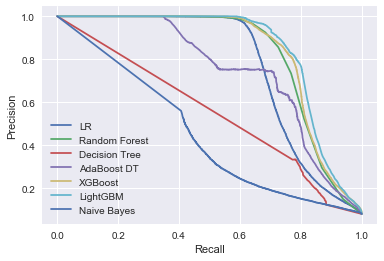

In [128]:
p_lr, r_lr, t_lr = precision_recall_curve(y_test,pred_lr[:,1])
p_rfc, r_rfc, t_rfc = precision_recall_curve(y_test,pred_rfc[:,1])
p_dtc, r_dtc, t_dtc = precision_recall_curve(y_test,pred_dtc[:,1])
p_abdt, r_abdt, t_abdt = precision_recall_curve(y_test,pred_abdt[:,1])
p_xgb, r_xgb, t_xgb = precision_recall_curve(y_test,pred_xg[:,1])
p_gbm, r_gbm, t_gbm = precision_recall_curve(y_test,pred_gbm)
p_nb, r_nb, t_nb = precision_recall_curve(y_test,pred_nb[:,1])

plt.plot(r_lr,p_lr,label='LR')
plt.plot(r_rfc,p_rfc,label='Random Forest')
plt.plot(r_dtc,p_dtc,label='Decision Tree')
plt.plot(r_abdt,p_abdt,label='AdaBoost DT')
plt.plot(r_xgb,p_xgb,label='XGBoost')
plt.plot(r_gbm,p_gbm,label='LightGBM')
plt.plot(r_nb,p_nb,label='Naive Bayes')

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()

print("Logistic Regression AUC:{0} ".format(roc_auc_score(y_test,pred_lr[:,1])))
print("RandomForest AUC:{0} ".format(roc_auc_score(y_test,pred_rfc[:,1])))
print("Decision Tree AUC:{0} ".format(roc_auc_score(y_test,pred_dtc[:,1])))
print("Ada Boost Decision Tree AUC:{0} ".format(roc_auc_score(y_test,pred_abdt[:,1])))
print("XGBoost AUC:{0} ".format(roc_auc_score(y_test,pred_xg[:,1])))
print("LightGBM AUC:{0} ".format(roc_auc_score(y_test,pred_gbm)))
print("Naive Bayes AUC:{0} ".format(roc_auc_score(y_test,pred_nb[:,1])))

In [129]:
# Determine the false positive and true positive rates
fpr_lr, tpr_lr, _lr = roc_curve(y_test,pred_lr[:,1])
fpr_rfc, tpr_rfc, _rfc = roc_curve(y_test,pred_rfc[:,1])
fpr_dtc, tpr_dtc, _dtc = roc_curve(y_test,pred_dtc[:,1])
fpr_abdt, tpr_abdt, _abdt = roc_curve(y_test,pred_abdt[:,1])
fpr_xgb, tpr_xgb, _xgb = roc_curve(y_test,pred_xg[:,1])
fpr_gbm, tpr_gbm, _gbm = roc_curve(y_test,pred_gbm)
fpr_nb, tpr_nb, _nb = roc_curve(y_test,pred_nb[:,1])

In [130]:
# Calculate the AUC
roc_auc_lr = auc(fpr_lr, tpr_lr)
roc_auc_rfc = auc(fpr_rfc, tpr_rfc)
roc_auc_dtc = auc(fpr_dtc, tpr_dtc)
roc_auc_abdt = auc(fpr_abdt, tpr_abdt)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)
roc_auc_gbm = auc(fpr_gbm, tpr_gbm)
roc_auc_nb = auc(fpr_nb, tpr_nb)

print('Logistic Regression ROC AUC: %0.4f' % roc_auc_lr)
print('Random Forest ROC AUC: %0.4f' % roc_auc_rfc) 
print('Decision Tree ROC AUC: %0.4f' % roc_auc_dtc) 
print('AdaBoost Decision Tree ROC AUC: %0.4f' % roc_auc_abdt) 
print('XGBoost ROC AUC: %0.4f' % roc_auc_xgb) 
print('LightGBM ROC AUC: %0.4f' % roc_auc_gbm)
print('Naive Bayes ROC AUC: %0.4f' % roc_auc_nb)

Logistic Regression ROC AUC: 0.9070
Random Forest ROC AUC: 0.9221
Decision Tree ROC AUC: 0.8283
AdaBoost Decision Tree ROC AUC: 0.9235
XGBoost ROC AUC: 0.9407
LightGBM ROC AUC: 0.9453
Naive Bayes ROC AUC: 0.8012


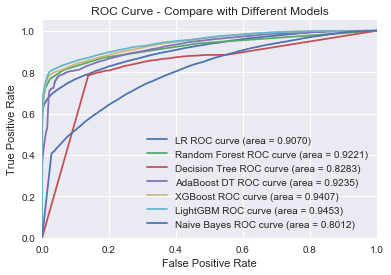

In [131]:
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr_lr, tpr_lr, label='LR ROC curve (area = %0.4f)' % roc_auc_lr)
plt.plot(fpr_rfc, tpr_rfc, label='Random Forest ROC curve (area = %0.4f)' % roc_auc_rfc)
plt.plot(fpr_dtc, tpr_dtc, label='Decision Tree ROC curve (area = %0.4f)' % roc_auc_dtc)
plt.plot(fpr_abdt, tpr_abdt, label='AdaBoost DT ROC curve (area = %0.4f)' % roc_auc_abdt)
plt.plot(fpr_xgb, tpr_xgb, label='XGBoost ROC curve (area = %0.4f)' % roc_auc_xgb)
plt.plot(fpr_gbm, tpr_gbm, label='LightGBM ROC curve (area = %0.4f)' % roc_auc_gbm)
plt.plot(fpr_nb, tpr_nb, label='Naive Bayes ROC curve (area = %0.4f)' % roc_auc_nb)

#plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Compare with Different Models')
plt.legend(loc="lower right")
plt.show()

In [133]:
print('Logistic Regression -- The RMSE of prediction is:', mean_squared_error(y_test, pred_lr[:,1]) ** 0.5)
print('Random Forest -- The RMSE of prediction is:', mean_squared_error(y_test, pred_rfc[:,1]) ** 0.5)
print('Decision Tree -- The RMSE of prediction is:', mean_squared_error(y_test, pred_dtc[:,1]) ** 0.5)
print('AdBoost Decision Tree -- The RMSE of prediction is:', mean_squared_error(y_test, pred_abdt[:,1]) ** 0.5)
print('XGBoost -- The RMSE of prediction is:', mean_squared_error(y_test, pred_xg[:,1]) ** 0.5)
print('LightGBM -- The RMSE of prediction is:', mean_squared_error(y_test, pred_gbm) ** 0.5)
print('Naive Bayes -- The RMSE of prediction is:', mean_squared_error(y_test, pred_nb[:,1]) ** 0.5)

Logistic Regression -- The RMSE of prediction is: 0.175823412455
Random Forest -- The RMSE of prediction is: 0.181678230252
Decision Tree -- The RMSE of prediction is: 0.378205065252
AdBoost Decision Tree -- The RMSE of prediction is: 0.465275830609
XGBoost -- The RMSE of prediction is: 0.15946282355
LightGBM -- The RMSE of prediction is: 0.156651503317
Naive Bayes -- The RMSE of prediction is: 0.311181503867


In [134]:
pred_lr2 = lr.predict(X_test)
pred_rfc2 = rfc.predict(X_test)
pred_dtc2 = dtc.predict(X_test)
pred_abdt2 = abdt.predict(X_test)
pred_xg2 = xg.predict(X_test)
pred_gbm = gbm.predict(X_test,num_iteration=gbm.best_iteration)
pred_nb2 = nb.predict(X_test)

In [135]:
print("Logistic Regression -- Accuracy: " + str(accuracy_score(y_test, pred_lr2)))
print("Random Forest -- Accuracy: " + str(accuracy_score(y_test, pred_rfc2)))
print("Decision Tree -- Accuracy: " + str(accuracy_score(y_test, pred_dtc2)))
print("AdaBoost Decision Tree -- Accuracy: " + str(accuracy_score(y_test, pred_abdt2)))
print("XGBoost -- Accuracy: " + str(accuracy_score(y_test, pred_xg2)))
print("LightGBM -- Accuracy: " + str(accuracy_score(y_test, (pred_gbm >0.5).astype(int))))
print("Naive Bayes -- Accuracy: " + str(accuracy_score(y_test, pred_nb2)))

Logistic Regression -- Accuracy: 0.967120436942
Random Forest -- Accuracy: 0.969982795796
Decision Tree -- Accuracy: 0.856570278047
AdaBoost Decision Tree -- Accuracy: 0.959622709549
XGBoost -- Accuracy: 0.968946035896
LightGBM -- Accuracy: 0.971361385953
Naive Bayes -- Accuracy: 0.900794097981


In [215]:
#feature importance
#Random Forest model -top 50 important features

names = X_train.columns.values
importances = rfc.feature_importances_
indices = np.argsort(importances)[::-1]
top_k = 50
new_indices = indices[:top_k]

print("Features sorted by their score: ")

for f in range(top_k):
    print("%d. feature %d - %s (%0.2f%%)" % (f + 1, indices[f], names[f], importances[new_indices[f]]*100))           

Features sorted by their score: 
1. feature 21 - loan_amnt (12.13%)
2. feature 22 - funded_amnt (10.29%)
3. feature 23 - funded_amnt_inv (8.94%)
4. feature 18 - int_rate (7.51%)
5. feature 16 - installment (7.22%)
6. feature 14 - annual_inc (5.37%)
7. feature 17 - dti (4.10%)
8. feature 15 - delinq_2yrs (3.96%)
9. feature 19 - inq_last_6mths (3.09%)
10. feature 4 - open_acc (2.93%)
11. feature 1 - pub_rec (2.48%)
12. feature 2 - revol_bal (2.13%)
13. feature 0 - revol_util (2.01%)
14. feature 28 - total_acc (1.94%)
15. feature 3 - out_prncp (1.85%)
16. feature 29 - out_prncp_inv (1.79%)
17. feature 11 - total_pymnt (1.55%)
18. feature 12 - total_pymnt_inv (1.50%)
19. feature 6 - total_rec_prncp (1.50%)
20. feature 20 - total_rec_int (1.49%)
21. feature 5 - total_rec_late_fee (1.43%)
22. feature 13 - recoveries (1.27%)
23. feature 8 - collection_recovery_fee (1.14%)
24. feature 9 - last_pymnt_amnt (1.06%)
25. feature 31 - collections_12_mths_ex_med (0.46%)
26. feature 27 - policy_code (

In [138]:
loandata5.shape

(887379, 43)

### Try:  No Convert Categorical Variable Data (No One-Hot-Encode)

In [200]:
def cleandata_with_c(dt):
    #convert all NaN to Zero
    data_1 = dt.replace(np.nan, 0)
    
    #numerical feature scaling
    scaler = MinMaxScaler()
    NUM_COLUMNS =list(dt.select_dtypes(exclude=['object','category']).columns)
    data_1[NUM_COLUMNS] = scaler.fit_transform(data_1[NUM_COLUMNS])
    
    #label encoding
    CAT_COLUMNS =list(dt.select_dtypes(include=['object','category']).columns)
    le = preprocessing.LabelEncoder()

    for col in CAT_COLUMNS:
        data_1[col] = le.fit_transform(data_1[col])
    
    return data_1

In [201]:
# data with category level
X_train_with_c =cleandata_with_c(X_train_1)
X_test_with_c =cleandata_with_c(X_test_1)

In [202]:
X_train_with_c.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_title
272870,0.565217,0.565217,0.571429,0,0.129700,0.429902,0,4,1,5,0.009684,2,0,1,31,0.000744,0.025641,0.0,0.190476,0.0,0.005761,0.048638,0.230769,1,0.259493,0.259493,0.152414,0.152414,0.205373,0.066846,0.00000,0.0,0.0,0.017281,0.0,0.0,0,0.0,0.0,0.003507,0.00386,1
308006,0.188406,0.188406,0.200000,0,0.129700,0.143343,0,4,1,4,0.003684,1,0,4,39,0.002119,0.025641,0.0,0.130952,0.0,0.000471,0.003474,0.082840,1,0.000000,0.000000,0.038963,0.038963,0.050291,0.018427,0.12546,0.0,0.0,0.018968,0.0,0.0,0,0.0,0.0,0.002059,0.00447,1
12938,1.000000,1.000000,0.999286,1,0.239544,0.521160,1,7,6,1,0.012632,2,0,4,35,0.000383,0.000000,0.0,0.166667,0.0,0.005781,0.020061,0.171598,0,0.000000,0.000000,0.698509,0.698010,0.999999,0.221360,0.00000,0.0,0.0,0.731498,0.0,0.0,0,0.0,0.0,0.000000,0.00000,1
507041,0.297101,0.297101,0.305714,1,0.517533,0.178215,3,18,8,1,0.008421,1,0,2,27,0.003681,0.025641,0.0,0.107143,0.0,0.003035,0.074302,0.147929,1,0.215441,0.214438,0.004500,0.004479,0.003231,0.006069,0.00000,0.0,0.0,0.007415,0.0,0.0,0,0.0,0.0,0.017149,0.00133,1
800999,0.710145,0.710145,0.714286,1,0.120828,0.345086,1,5,3,1,0.008105,1,0,2,20,0.001462,0.000000,0.0,0.130952,0.0,0.010888,0.046845,0.112426,1,0.442909,0.442909,0.079101,0.079101,0.089495,0.059406,0.00000,0.0,0.0,0.013956,0.0,0.0,0,0.0,0.0,0.061582,0.00757,1


In [203]:
# build models
rfc_c = RandomForestClassifier() #random forest
dtc_c = DecisionTreeClassifier(max_depth=30) #decision tree
abdt_c = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),learning_rate=1,algorithm="SAMME",n_estimators=300) #ABDT

In [218]:
xg_c =XGBClassifier() #XGBoost

In [219]:
xg_c.fit(X_train_with_c,y_train)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [204]:
rfc_c.fit(X_train_with_c,y_train)
dtc_c.fit(X_train_with_c,y_train)
abdt_c.fit(X_train_with_c,y_train)

AdaBoostClassifier(algorithm='SAMME',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1, n_estimators=300, random_state=None)

In [205]:
pred_rfc_c = rfc_c.predict_proba(X_test_with_c)
pred_dtc_c = dtc_c.predict_proba(X_test_with_c)
pred_abdt_c = abdt_c.predict_proba(X_test_with_c)

In [221]:
pred_xg_c = xg_c.predict_proba(X_test_with_c)

RandomForest AUC:0.9280711833516901 
Decision Tree AUC:0.7848569757055754 
Ada Boost Decision Tree AUC:0.9278136071182079 
XGBoost AUC:0.9426052979333526 


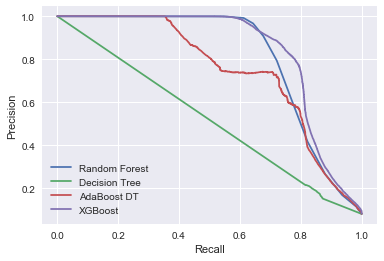

In [222]:
p_rfc_c, r_rfc_c, t_rfc_c = precision_recall_curve(y_test,pred_rfc_c[:,1])
p_dtc_c, r_dtc_c, t_dtc_c = precision_recall_curve(y_test,pred_dtc_c[:,1])
p_abdt_c, r_abdt_c, t_abdt_c = precision_recall_curve(y_test,pred_abdt_c[:,1])
p_xgb_c, r_xgb_c, t_xgb_c = precision_recall_curve(y_test,pred_xg_c[:,1])


plt.plot(r_rfc_c,p_rfc_c,label='Random Forest')
plt.plot(r_dtc_c,p_dtc_c,label='Decision Tree')
plt.plot(r_abdt_c,p_abdt_c,label='AdaBoost DT')
plt.plot(r_xgb_c,p_xgb_c,label='XGBoost')

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()

print("RandomForest AUC:{0} ".format(roc_auc_score(y_test,pred_rfc_c[:,1])))
print("Decision Tree AUC:{0} ".format(roc_auc_score(y_test,pred_dtc_c[:,1])))
print("Ada Boost Decision Tree AUC:{0} ".format(roc_auc_score(y_test,pred_abdt_c[:,1])))
print("XGBoost AUC:{0} ".format(roc_auc_score(y_test,pred_xg_c[:,1])))

In [224]:
# Determine the false positive and true positive rates
fpr_rfc_c, tpr_rfc_c, _rfc_c = roc_curve(y_test,pred_rfc_c[:,1])
fpr_dtc_c, tpr_dtc_c, _dtc_c = roc_curve(y_test,pred_dtc_c[:,1])
fpr_abdt_c, tpr_abdt_c, _abdt_c = roc_curve(y_test,pred_abdt_c[:,1])
fpr_xgb_c, tpr_xgb_c, _xgb_c = roc_curve(y_test,pred_xg_c[:,1])

In [225]:
# Calculate the AUC
roc_auc_rfc_c = auc(fpr_rfc_c, tpr_rfc_c)
roc_auc_dtc_c = auc(fpr_dtc_c, tpr_dtc_c)
roc_auc_abdt_c = auc(fpr_abdt_c, tpr_abdt_c)
roc_auc_xgb_c = auc(fpr_xgb_c, tpr_xgb_c)

print('Random Forest ROC AUC: %0.4f' % roc_auc_rfc_c) 
print('Decision Tree ROC AUC: %0.4f' % roc_auc_dtc_c) 
print('AdaBoost Decision Tree ROC AUC: %0.4f' % roc_auc_abdt_c) 
print('XGBoost ROC AUC: %0.4f' % roc_auc_xgb_c) 

Random Forest ROC AUC: 0.9281
Decision Tree ROC AUC: 0.7849
AdaBoost Decision Tree ROC AUC: 0.9278
XGBoost ROC AUC: 0.9426


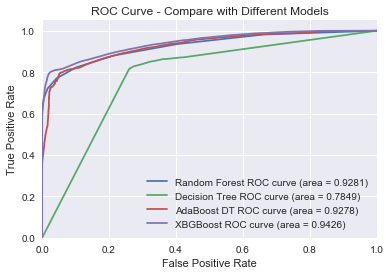

In [226]:
# Plot of a ROC curve for a specific class
plt.figure()

plt.plot(fpr_rfc_c, tpr_rfc_c, label='Random Forest ROC curve (area = %0.4f)' % roc_auc_rfc_c)
plt.plot(fpr_dtc_c, tpr_dtc_c, label='Decision Tree ROC curve (area = %0.4f)' % roc_auc_dtc_c)
plt.plot(fpr_abdt_c, tpr_abdt_c, label='AdaBoost DT ROC curve (area = %0.4f)' % roc_auc_abdt_c)
plt.plot(fpr_xgb_c, tpr_xgb_c, label='XBGBoost ROC curve (area = %0.4f)' % roc_auc_xgb_c)

#plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Compare with Different Models')
plt.legend(loc="lower right")
plt.show()

In [227]:
pred_rfc2_c = rfc_c.predict(X_test_with_c)
pred_dtc2_c = dtc_c.predict(X_test_with_c)
pred_abdt2_c = abdt_c.predict(X_test_with_c)
pred_xgb2_c = xg_c.predict(X_test_with_c)

In [228]:
print("Random Forest -- Accuracy: " + str(accuracy_score(y_test, pred_rfc2_c)))
print("Decision Tree -- Accuracy: " + str(accuracy_score(y_test, pred_dtc2_c)))
print("AdaBoost Decision Tree -- Accuracy: " + str(accuracy_score(y_test, pred_abdt2_c)))
print("XGBoost -- Accuracy: " + str(accuracy_score(y_test, pred_abdt2_c)))

Random Forest -- Accuracy: 0.962383646239
Decision Tree -- Accuracy: 0.744081828905
AdaBoost Decision Tree -- Accuracy: 0.959314686681
XGBoost -- Accuracy: 0.959314686681


In [217]:
#feature importance
#Random Forest model -top 30 important features

names = X_train_with_c.columns.values
importances = rfc_c.feature_importances_
indices = np.argsort(importances)[::-1]
top_k = 30
new_indices = indices[:top_k]

print("Features sorted by their score: ")

for f in range(top_k):
    print("%d. feature %d - %s (%0.2f%%)" % (f + 1, indices[f], names[f], importances[new_indices[f]]*100)) 

Features sorted by their score: 
1. feature 32 - loan_amnt (14.37%)
2. feature 31 - funded_amnt (12.51%)
3. feature 33 - funded_amnt_inv (9.31%)
4. feature 28 - term (8.35%)
5. feature 27 - int_rate (6.79%)
6. feature 24 - installment (3.98%)
7. feature 29 - grade (3.77%)
8. feature 25 - sub_grade (3.54%)
9. feature 5 - emp_length (3.21%)
10. feature 1 - home_ownership (3.17%)
11. feature 26 - annual_inc (2.94%)
12. feature 2 - verification_status (2.60%)
13. feature 0 - pymnt_plan (2.04%)
14. feature 4 - purpose (1.99%)
15. feature 40 - addr_state (1.75%)
16. feature 39 - dti (1.74%)
17. feature 20 - delinq_2yrs (1.64%)
18. feature 15 - inq_last_6mths (1.62%)
19. feature 21 - open_acc (1.55%)
20. feature 10 - pub_rec (1.43%)
21. feature 7 - revol_bal (1.36%)
22. feature 17 - revol_util (1.32%)
23. feature 22 - total_acc (1.28%)
24. feature 14 - initial_list_status (1.10%)
25. feature 18 - out_prncp (1.07%)
26. feature 30 - out_prncp_inv (1.05%)
27. feature 8 - total_pymnt (0.83%)
28. 

Conclusion: Some categorical features have higher score on feature importance(term,installment,grade,sub_grade and etc.). The accuracy of random forest on data with one-hot-encode and data with label encode are nearly the same.It doesn't have much difference.